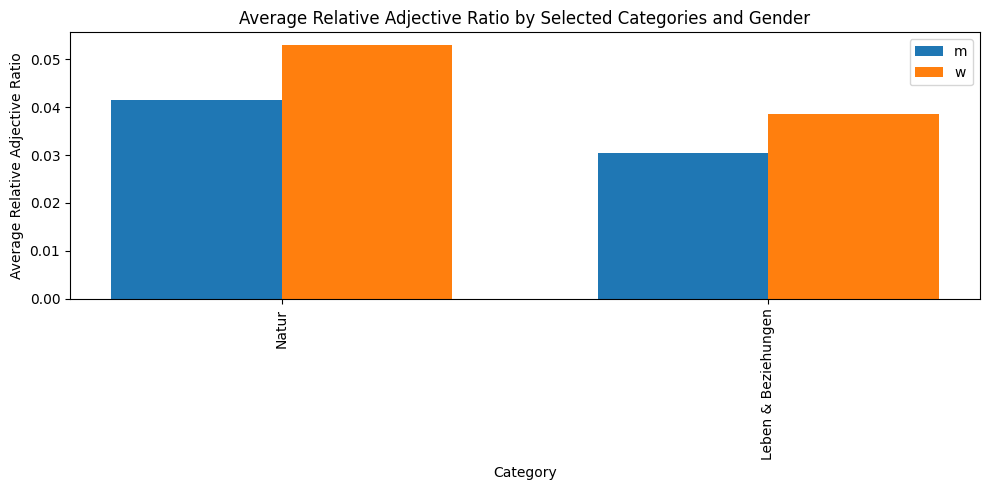

Gender: m
Overall average relative adjective ratio: 0.035436649350639324
Median relative adjective ratio: 0.03076923076923077
Minimum relative adjective ratio: 0.0
Maximum relative adjective ratio: 0.13978494623655913 

Gender: w
Overall average relative adjective ratio: 0.04487203137037537
Median relative adjective ratio: 0.04
Minimum relative adjective ratio: 0.0
Maximum relative adjective ratio: 0.16393442622950818 

Gender: m
Category: Natur
10 most common adjectives: [('weißen', 7), ('grünen', 6), ('kleine', 5), ('andere', 5), ('große', 4), ('offene', 3), ('großer', 3), ('kleiner', 3), ('letzten', 3), ('ganze', 3)] 

Category: Leben & Beziehungen
10 most common adjectives: [('ersten', 4), ('langen', 4), ('letzten', 4), ('alte', 4), ('kleinste', 4), ('kleinen', 4), ('letzte', 3), ('alten', 3), ('ganze', 3), ('fremden', 3)] 

Gender: w
Category: Natur
10 most common adjectives: [('alten', 5), ('eigenen', 3), ('10.', 3), ('hellen', 3), ('riesige', 3), ('klare', 3), ('ganzen', 3), ('s

In [1]:
import os
import json
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import statistics

from scipy.stats import ttest_ind, shapiro, mannwhitneyu

path = r'corpus_finished'

# Load German tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load('de_core_news_md')

# Function to extract adjectives from a text
def extract_adjectives(text):
    doc = nlp(text)
    return [token.text for token in doc if token.pos_ == 'ADJ']

# Initialize data structures
adjectives_gender_category = {'m': {}, 'w': {}}
adjective_ratios_gender_category = {'m': {}, 'w': {}}

# Iterate over .json files
for filename in os.listdir(path):
    if filename.endswith('.json'):
        with open(os.path.join(path, filename), 'r', encoding='utf-8') as f:
            data = json.load(f)
            gender = data['gender']
            poem_text = ' '.join(line['text'] for line in data['poem'].values())
            adjectives = extract_adjectives(poem_text)
            ratio = len(adjectives) / len(poem_text.split())
            for category in data['categories']:
                if category not in adjectives_gender_category[gender]:
                    adjectives_gender_category[gender][category] = Counter()
                    adjective_ratios_gender_category[gender][category] = []
                adjectives_gender_category[gender][category].update(adjectives)
                adjective_ratios_gender_category[gender][category].append(ratio)

# Calculate average adjective ratios for each gender and category
average_ratios_gender_category = {
    gender: {category: sum(ratios) / len(ratios) for category, ratios in categories.items()}
    for gender, categories in adjective_ratios_gender_category.items()
}

# Select categories
selected_categories = ['Natur', 'Leben & Beziehungen']

# Get all unique genders
all_genders = sorted(list(average_ratios_gender_category.keys()))

# Create a bar chart for each category, comparing genders
bar_width = 0.35
index = np.arange(len(selected_categories))

plt.figure(figsize=(10, 5))

for i, gender in enumerate(all_genders):
    ratios = [average_ratios_gender_category[gender].get(category, 0) for category in selected_categories]
    plt.bar(index + i * bar_width, ratios, bar_width, label=gender)

plt.title('Average Relative Adjective Ratio by Selected Categories and Gender')
plt.xlabel('Category')
plt.ylabel('Average Relative Adjective Ratio')
plt.xticks(index + bar_width / 2, selected_categories, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Print the overall, median, minimum and maximum adjective ratio for each gender
for gender in all_genders:
    all_ratios = [ratio for ratios in adjective_ratios_gender_category[gender].values() for ratio in ratios]
    print(f'Gender: {gender}')
    print('Overall average relative adjective ratio:', sum(all_ratios) / len(all_ratios))
    print('Median relative adjective ratio:', statistics.median(all_ratios))
    print('Minimum relative adjective ratio:', min(all_ratios))
    print('Maximum relative adjective ratio:', max(all_ratios), '\n')

# Print the 10 most common adjectives for each gender and selected category
for gender in all_genders:
    print(f'Gender: {gender}')
    for category in selected_categories:
        print(f'Category: {category}')
        print('10 most common adjectives:', adjectives_gender_category[gender][category].most_common(10), '\n')

# Print the 10 most common adjectives for each gender overall
for gender in all_genders:
    all_adjectives = Counter()
    for counter in adjectives_gender_category[gender].values():
        all_adjectives.update(counter)
    print(f'Gender: {gender}')
    print('10 most common adjectives overall:', all_adjectives.most_common(10), '\n')

In [5]:
# Funktion zum Durchführen des Shapiro-Wilk-Tests und zur Interpretation der Ergebnisse
def test_normality(data, sample_name):
    stat, p_value = shapiro(data)
    alpha = 0.05  # Signifikanzniveau
    print(f"Shapiro-Wilk-Test für {sample_name}:")
    print("Teststatistik:", stat)
    print("p-Wert:", p_value)
    if p_value > alpha:
        print(f"Die Adjektivfrequenzen für {sample_name} sind normalverteilt.")
    else:
        print(f"Die Adjektivfrequenzen für {sample_name} sind nicht normalverteilt.")

# Durchführung des Tests für beide Subsamples
ratios_m = [ratio for ratios in adjective_ratios_gender_category['m'].values() for ratio in ratios]
ratios_w = [ratio for ratios in adjective_ratios_gender_category['w'].values() for ratio in ratios]
test_normality(ratios_m, "Sample M")
test_normality(ratios_w, "Sample W")

Shapiro-Wilk-Test für Sample M:
Teststatistik: 0.9189143776893616
p-Wert: 3.864284922865807e-14
Die Adjektivfrequenzen für Sample M sind nicht normalverteilt.
Shapiro-Wilk-Test für Sample W:
Teststatistik: 0.9124147295951843
p-Wert: 2.063676052960206e-12
Die Adjektivfrequenzen für Sample W sind nicht normalverteilt.


In [3]:
import scipy.stats as stats

# Perform a t-test to compare the means of the two groups
t_stat, p_val = stats.ttest_ind(ratios_m, ratios_w)

print('T-statistic:', t_stat)
print('p-value:', p_val)

T-statistic: -4.122015446548093
p-value: 4.192930758625655e-05


In [4]:
# Perform the Mann-Whitney-U-Test to compare the distributions
u_stat, p_val = stats.mannwhitneyu(ratios_m, ratios_w, alternative='two-sided')

print('Mann-Whitney U-Statistik:', u_stat)
print('p-Wert:', p_val)

Mann-Whitney U-Statistik: 54837.0
p-Wert: 0.0012882381093315776


In [8]:
n1 = len(ratios_m)
n2 = len(ratios_w)
effect_size = np.sqrt(u_stat / (n1 * n2))

print("Effektstärke (Cramer's V):", effect_size)

Effektstärke (Cramer's V): 0.6557847528039698
